In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
import seaborn as sns

In [244]:
n = 1000 # datapoints
p = 10 # features
X = np.random.normal(size=n*p).reshape((n,p))

min_2 = 2+abs(X[:, 2].min())

y = 0.35*X[:, 0] + 0.3*X[:, 1] + np.log(min_2+X[:, 2]) + 0.3*np.random.normal(size=n*1) + (np.add(X[:, 3], X[:, 4]))/5 + np.power(np.absolute(X[:, 5]), 1/3)



In [245]:
pd.DataFrame(np.insert(X, 0, y, axis=1)).head() # insert into X 0th column, y

,0,1,2,3,4,5,6,7,8,9,10
0,3.750272,1.463394,0.810959,1.077235,-0.175395,-0.504914,0.664815,0.339678,-0.981506,-0.163389,-0.039326
1,3.770262,-0.186053,-0.340164,1.528532,3.188667,1.462527,-0.834485,1.300578,-0.563953,1.988398,-0.249570
2,0.818413,-1.513146,-2.223410,-1.179482,0.274010,0.595871,0.057370,0.931965,0.822407,-2.510737,-0.066944
3,1.665048,-0.821703,0.047222,0.596513,-0.412707,-0.832919,0.403008,-1.348085,-0.504250,-0.389481,-0.072889
4,1.848324,-0.196053,0.250358,-1.527763,0.160565,-0.212517,-0.641285,-1.644303,-0.690306,-0.006411,-2.287742
5,2.689293,0.569262,0.407719,-1.114055,0.159144,0.946466,0.870795,-0.389885,-0.270913,1.943856,-0.342662
6,1.124740,-2.021470,-1.469790,-0.507965,0.374838,-0.114973,-1.799349,-0.719630,-0.723937,1.575578,-0.611657
7,1.211454,0.044933,0.534879,-1.992522,0.411212,-1.949974,0.286564,-0.925173,-0.648452,-1.581881,-0.475564
8,1.531634,-1.598807,-0.051262,-0.111511,1.055714,-1.320643,-0.646309,-0.981791,0.191767,0.104316,1.099865
9,2.531483,-0.521352,0.252041,-0.667040,0.670568,-1.264601,0.284882,1.236635,0.369312,-0.619727,1.315239


In [246]:
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

In [247]:
corrmat

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.500606,0.413916,0.320143,0.235517,0.265361,0.038324,0.010825,-0.026183,-0.056276,0.027839
1,0.500606,1.000000,-0.018567,0.033264,-0.031991,0.000365,0.044868,0.001339,-0.039267,-0.013968,0.009917
2,0.413916,-0.018567,1.000000,0.027433,-0.029895,-0.013156,0.018676,-0.048480,0.057573,-0.063444,-0.003793
3,0.320143,0.033264,0.027433,1.000000,-0.056208,0.037424,-0.009803,-0.010594,-0.047971,0.058234,-0.004755
4,0.235517,-0.031991,-0.029895,-0.056208,1.000000,-0.029161,0.001639,0.006548,-0.039684,-0.010079,0.043276
5,0.265361,0.000365,-0.013156,0.037424,-0.029161,1.000000,-0.033888,0.018203,0.014830,0.019555,-0.014419
6,0.038324,0.044868,0.018676,-0.009803,0.001639,-0.033888,1.000000,0.009211,0.019446,0.001734,0.005834
7,0.010825,0.001339,-0.048480,-0.010594,0.006548,0.018203,0.009211,1.000000,-0.014853,0.010193,-0.010013
8,-0.026183,-0.039267,0.057573,-0.047971,-0.039684,0.014830,0.019446,-0.014853,1.000000,0.049542,-0.047264
9,-0.056276,-0.013968,-0.063444,0.058234,-0.010079,0.019555,0.001734,0.010193,0.049542,1.000000,0.015601


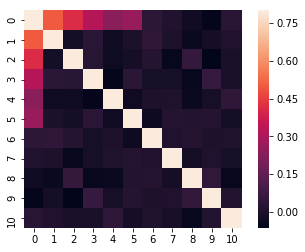

In [248]:
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [249]:
regr = LinearRegression()

In [250]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [251]:
# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

R-squared regression: 0.6688759742360919


In [252]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=1)

In [253]:
# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

PLSRegression(copy=True, max_iter=500, n_components=1, scale=True, tol=1e-06)

In [254]:
# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

R-squared PLSR: 0.6644632721599137


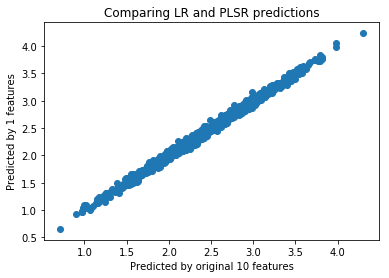

In [255]:
# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 1 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()